# Mandatory Assignment FIE463 - Numerical Methods in Macroeconomics and Finance using Python

## Task 1
#### Risky return and a positive risk premium

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Computing the expected risky return and risk premium

def expected_risky_return(mu, epsilon):
   
   # Secnarios and probabilities
    pi_hi, pi_lo, pi_crash = 0.5, 0.45, 0.05  
    R_hi = 1 + mu + epsilon 
    R_lo = 1 + mu - epsilon 
    R_crash = 1 + mu - 3 * epsilon 
    
    expected_R = pi_hi * R_hi + pi_lo * R_lo + pi_crash * R_crash #Forula for expected return
    return expected_R

# Given parameters
mu, epsilon, R_f = 0.06, 0.2, 1
expected_R = expected_risky_return(mu, epsilon)
risk_premium = expected_R - R_f

#Print the results
print("Expected risky return:", expected_R)
print("Risk premium:", risk_premium)

Expected risky return: 1.04
Risk premium: 0.040000000000000036


## Task 2
#### Utility function

In [9]:
# 2. Defining the utility function

def util(c, gamma): 
    if gamma == 1:
        return np.log(c)
    return (c**(1 - gamma)) / (1 - gamma)


## Task 3
#### Expected lifetime utility function


In [10]:
# 3. Computing the expected lifetime utility

def expected_util(s, alpha, beta, gamma, epsilon, mu, w):
    c1 = w - s  # Consumption in period 1
    
    # Risky return states
    R_hi = 1 + mu + epsilon
    R_lo = 1 + mu - epsilon
    R_crash = 1 + mu - 3 * epsilon
    
    c2_hi = R_hi * alpha * s + R_f * (1 - alpha) * s
    c2_lo = R_lo * alpha * s + R_f * (1 - alpha) * s
    c2_crash = R_crash * alpha * s + R_f * (1 - alpha) * s
    
    # Expected utility
    expected_u = 0.5 * util(c2_hi, gamma) + 0.45 * util(c2_lo, gamma) + 0.05 * util(c2_crash, gamma) #Formula for expected utility
    
    return util(c1, gamma) + beta * expected_u


## Task 4
#### Visualizing expected lifetime utility for selected values

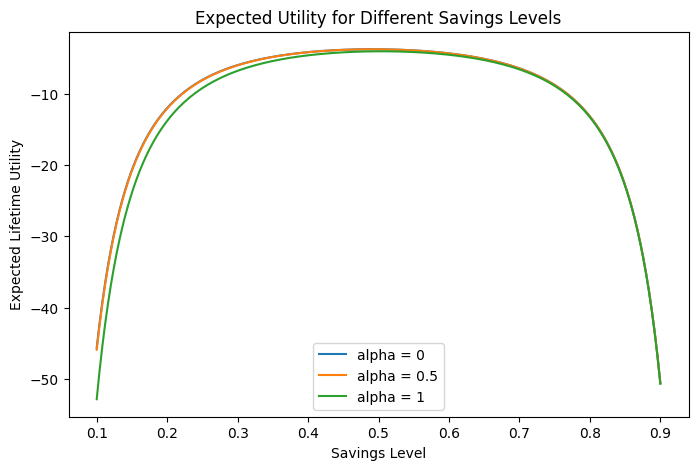

In [11]:
 # 4. Visualizing expected lifetime utility

w, beta, gamma = 1, 0.9, 3
s_grid = np.linspace(0.1, w - 0.1, 200)
alphas = [0, 0.5, 1]

plt.figure(figsize=(8, 5))
for alpha in alphas:
    utilities = [expected_util(s, alpha, beta, gamma, epsilon, mu, w) for s in s_grid] 
    plt.plot(s_grid, utilities, label=f'alpha = {alpha}')

#Plot the graph
plt.xlabel('Savings Level')
plt.ylabel('Expected Lifetime Utility')
plt.legend()
plt.title('Expected Utility for Different Savings Levels')
plt.show()#

##### The inverted U-shape of the expected lifetime utility vs. savings level curve comes from the trade-off between consuming today and saving for future consumption. The concave utility function ensures that both too little and too much saving decrease total expected utility, forming an inverted U-shape.

## Task 5 & Task 6
#### Locating the optimal choices for gien parametes & printing the optimal choices

In [12]:
# 5. Finding the optimal savings and investment choices

def find_optimum(beta, gamma, epsilon, mu, w): 
    
    s_grid = np.linspace(1e-6, w - 1e-6, 1000)   # Create a range of possible savings (from a very small amount to almost the full wealth)
    alpha_grid = np.linspace(0, 1, 1000)     # Create a range of possible investment fractions (from 0 to 1)
    
    S, A = np.meshgrid(s_grid, alpha_grid)
    utilities = expected_util(S, A, beta, gamma, epsilon, mu, w)
    
    max_index = np.argmax(utilities)
    optimal_s = S.flatten()[max_index]
    optimal_alpha = A.flatten()[max_index]
    max_utility = utilities.flatten()[max_index]
    
    return optimal_s, optimal_alpha, max_utility

#Print out the results
opt_s, opt_alpha, opt_U = find_optimum(beta, gamma, epsilon, mu, w) #Call the function to find the best choices
print("Optimal savings:", opt_s)
print("Optimal risky share:", opt_alpha)
print("Maximized expected utility:", opt_U)

Optimal savings: 0.4904905095095094
Optimal risky share: 0.2272272272272272
Maximized expected utility: -3.7792937499963184


## Task 7
#### Visulizing the optimal risky share vs gamma 

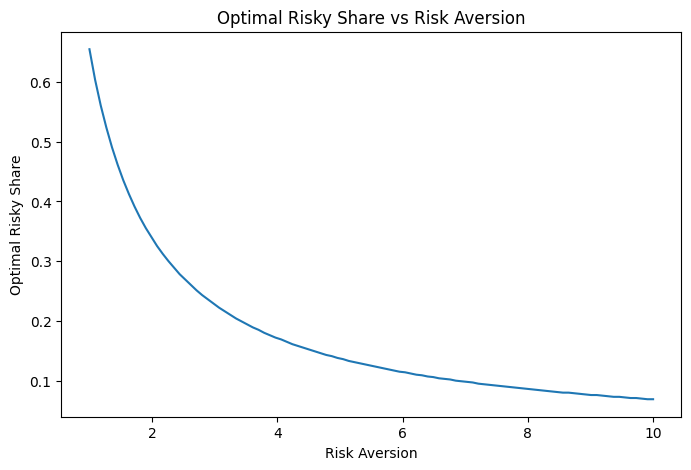

In [13]:
# 7. Investigating optimal risky share as a function of gamma

gamma_values = np.linspace(1, 10, 101)
opt_risk_shares = [find_optimum(beta, g, epsilon, mu, w)[1] for g in gamma_values] #Finding optimal risky share for each gamma

#Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(gamma_values, opt_risk_shares)
plt.xlabel('Risk Aversion')
plt.ylabel('Optimal Risky Share')
plt.title('Optimal Risky Share vs Risk Aversion')
plt.show()

##### The optimal risky share vs. risk aversion curve is decreasing because higher risk aversion leads to a preference for safer investments. If you have low risk aversion, you don't care much about risk, and therefore you have a high proportion of risky assets. On the other hand, if you have high risk aversion and are a risk-averse person, you have a low proportion in risky assets and instead hold more in risk-free assets.

## Task 8
#### Visulizing the optimal risky share regarding the epsilon/volatility

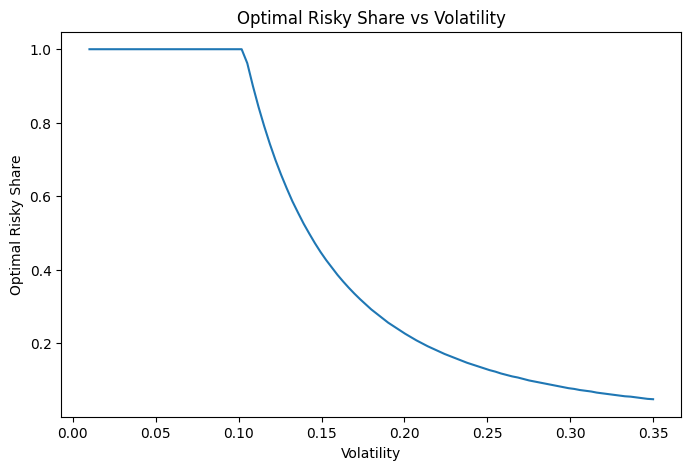

In [14]:
# 8. Investigating optimal risky share as a function of epsilon

epsilon_values = np.linspace(0.01, 0.35, 101)
opt_risk_shares_eps = [find_optimum(beta, gamma, e, mu, w)[1] for e in epsilon_values] #Findng optimal risky share for each epsilon

#Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, opt_risk_shares_eps)
plt.xlabel('Volatility')
plt.ylabel('Optimal Risky Share')
plt.title('Optimal Risky Share vs Volatility')
plt.show()

##### The optimal risky share vs. volatility curve is flat at α = 1 up to ε ≈ 0.1, then starts decreasing. When volatility is low, the risky asset remains attractive, so investors fully allocate to it. Around ε = 0.1, rising uncertainty makes the risky asset less appealing. When it starts to decrease, the composition of risky and risk-free assets changes quickly at first, before the change becomes smaller and smaller as volatility increases. One is more sensitive from epsilon 0.1 to 0.2 than from 0.2 to 0.3.